## A2.1 Text Processing & Zipf’s Law 

### **Step 1.** To access the full Brown corpus, import it from NLTK 
Compute a list of unique words sorted by descending frequency for (i) the whole corpus and (ii) two different genres of your choice.

In [77]:
#libraries:
import nltk
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import brown
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [20]:
#downloads (do only once :))
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package brown to /Users/jago/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jago/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
words = brown.words()
fwords = FreqDist(words)

#unique words & their frequencies (i) for whole corpus
print(fwords.most_common(100))

[('the', 62713), (',', 58334), ('.', 49346), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011), ('was', 9777), ('for', 8841), ('``', 8837), ("''", 8789), ('The', 7258), ('with', 7012), ('it', 6723), ('as', 6706), ('he', 6566), ('his', 6466), ('on', 6395), ('be', 6344), (';', 5566), ('I', 5161), ('by', 5103), ('had', 5102), ('at', 4963), ('?', 4693), ('not', 4423), ('are', 4333), ('from', 4207), ('or', 4118), ('this', 3966), ('have', 3892), ('an', 3542), ('which', 3540), ('--', 3432), ('were', 3279), ('but', 3007), ('He', 2982), ('her', 2885), ('one', 2873), ('they', 2773), ('you', 2766), ('all', 2726), ('would', 2677), ('him', 2576), ('their', 2562), ('been', 2470), (')', 2466), ('(', 2435), ('has', 2425), ('will', 2204), ('who', 2192), ('more', 2130), ('out', 2058), ('It', 2037), ('we', 1973), ('she', 1949), ('said', 1943), ('there', 1877), ('up', 1874), ('In', 1801), (':', 1795), ('than', 1788), ('them', 1786), ('into', 1782), (

In [10]:
# available genres = brown.categories()
# ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
#(ii) for two different genres of your choice.
words_news = brown.words(categories='news')
words_hobbies = brown.words(categories='hobbies')
fwords_news = FreqDist(words_news)
fwords_hobbies = FreqDist(words_hobbies)
print("The 100 most common news words:",fwords_news.most_common(100))
print("The 100 most common hobbies words:",fwords_hobbies.most_common(100))

The 100 most common news words: [('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993), ('in', 1893), ('for', 943), ('The', 806), ('that', 802), ('``', 732), ('is', 732), ('was', 717), ("''", 702), ('on', 657), ('at', 598), ('with', 545), ('be', 526), ('by', 497), ('as', 481), ('he', 451), ('said', 402), ('his', 399), ('will', 389), ('it', 363), ('from', 344), ('are', 328), (';', 314), ('an', 300), ('has', 300), ('--', 300), ('had', 279), ('who', 268), ('have', 265), ('not', 254), ('Mrs.', 253), ('were', 252), ('this', 250), ('which', 244), ('would', 244), ('their', 219), ('been', 212), ('they', 205), ('He', 191), ('one', 184), ('I', 179), ('but', 174), ('its', 174), ('or', 173), (')', 171), ('more', 171), ('Mr.', 170), ('(', 168), ('up', 168), ('all', 163), ('out', 161), ('last', 161), ('two', 157), ('other', 149), (':', 149), ('new', 148), ('first', 143), ('than', 138), ('year', 138), ('A', 137), ('about', 136), ('there', 131), ('when', 128),

### **Step 2.** Extract the following information for each portion (corpus + each genre): 
This process and informations should be visible in your code and output files:  
(i) number of tokens;  
(ii) number of types;  
(iii) number of words;  
(iv) average number of words per sentence;  
(v) average word length;  
(vi) number of lemmas.

In [23]:
print(f"Number of tokens in the main corpus {len(words)}\nNumber of tokens in the news corpus {len(words_news)}\nNumber of tokens in the hobbies corpus {len(words_hobbies)}")

Number of tokens in the main corpus 1161192
Number of tokens in the news corpus 100554
Number of tokens in the hobbies corpus 82345


In [21]:
corpus_types = len(fwords)
news_types = len(fwords_news)
hobbies_types = len(fwords_hobbies)
print(f"Number of types in the main corpus {corpus_types}\nNumber of types in the news corpus {news_types}\nNumber of types in the hobbies corpus {hobbies_types}")

Number of types in the main corpus 56057
Number of types in the news corpus 14394
Number of types in the hobbies corpus 11935


In [15]:
corpus_words = len(set(word.lower() for word in words if word.isalpha()))
news_words = len(set(word.lower() for word in words_news if word.isalpha()))
hobbies_words = len(set(word.lower() for word in words_hobbies if word.isalpha()))
print(f"Number of words in the main corpus {corpus_words}\nNumber of words in the news corpus {news_words}\nNumber of words in the hobbies corpus {hobbies_words}")

Number of words in the main corpus 40234
Number of words in the news corpus 11151
Number of words in the hobbies corpus 9373


In [41]:
def av_words_all():
    text = ' '.join(brown.words())
    sentence_tokenizer = PunktSentenceTokenizer()
    sentences = sentence_tokenizer.tokenize(text)
    sentence_word_lists = [word_tokenize(sent) for sent in sentences]
    average_length = sum(len(s) for s in sentence_word_lists) / len(sentence_word_lists)
    return average_length
    
def av_words(category):
    text = ' '.join(brown.words(categories=category))
    sentence_tokenizer = PunktSentenceTokenizer()
    sentences = sentence_tokenizer.tokenize(text)
    sentence_word_lists = [word_tokenize(sent) for sent in sentences]
    average_length = sum(len(s) for s in sentence_word_lists) / len(sentence_word_lists)
    return average_length


print(f"Average sentence length in main corpus: {av_words_all():.2f}")
print(f"Average sentence length in news category: {av_words('news'):.2f}")
print(f"Average sentence length in hobbies category: {av_words('hobbies'):.2f}")

Average sentence length in main corpus: 19.84
Average sentence length in news category: 19.69
Average sentence length in hobbies category: 20.26


In [45]:
av_word = sum(len(s) for s in words) / len(words)
av_word_news = sum(len(s) for s in words_news) / len(words_news)
av_word_hobbies = sum(len(s) for s in words_hobbies) / len(words_hobbies)

print(f"Average word length in main corpus: {av_word:.2f}")
print(f"Average word length in news category: {av_word_news:.2f}")
print(f"Average word length in hobbies category: {av_word_hobbies:.2f}")

Average word length in main corpus: 4.28
Average word length in news category: 4.40
Average word length in hobbies category: 4.36


In [50]:
lemmatizer = WordNetLemmatizer()

main_lemmas = [lemmatizer.lemmatize(w) for w in words]
news_lemmas = [lemmatizer.lemmatize(w) for w in words_news]
hobbies_lemmas = [lemmatizer.lemmatize(w) for w in words_hobbies]

print(f"Number of lemmas in main corpus: {len(main_lemmas)}")
print(f"Number of lemmas in news category: {len(news_lemmas)}")
print(f"Number of lemmas in hobbies category: {len(hobbies_lemmas)}")

Number of lemmas in main corpus: 1161192
Number of lemmas in news category: 100554
Number of lemmas in hobbies category: 82345


### **Step 3.** Run a default part-of-speech (POS) tagger on the dataset.
Identify the ten most frequent POS tags.

In [53]:
brown_tagged = brown.tagged_words(tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_tagged)
tag_fd.most_common(10)

[('NOUN', 275558),
 ('VERB', 182750),
 ('.', 147565),
 ('ADP', 144766),
 ('DET', 137019),
 ('ADJ', 83721),
 ('ADV', 56239),
 ('PRON', 49334),
 ('CONJ', 38151),
 ('PRT', 29829)]

### **Step 4.** Use the Python library matplotlib. 
Plot the frequency curves for the corpus and two genres you choose: i.e. x-axis is position in the frequency list, y-axis is frequency. Provide both a plot with linear axes and one with log-log axes.

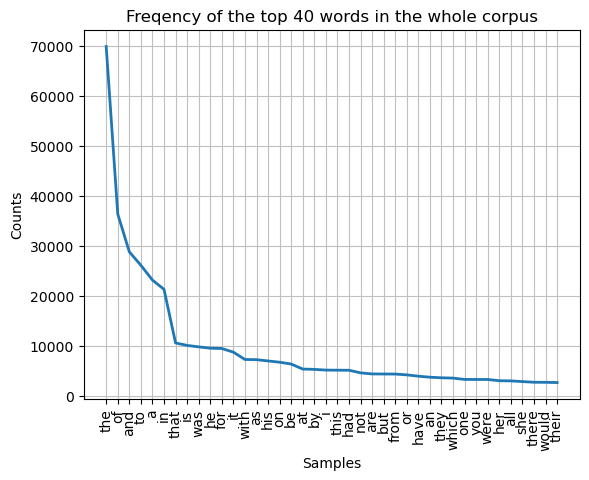

<Axes: title={'center': 'Freqency of the top 40 words in the whole corpus'}, xlabel='Samples', ylabel='Counts'>

In [70]:
fwords = FreqDist(word.lower() for word in words if word.isalpha())
fwords.plot(40, title='Freqency of the top 40 words in the whole corpus', cumulative=False, percents=False, show=True)

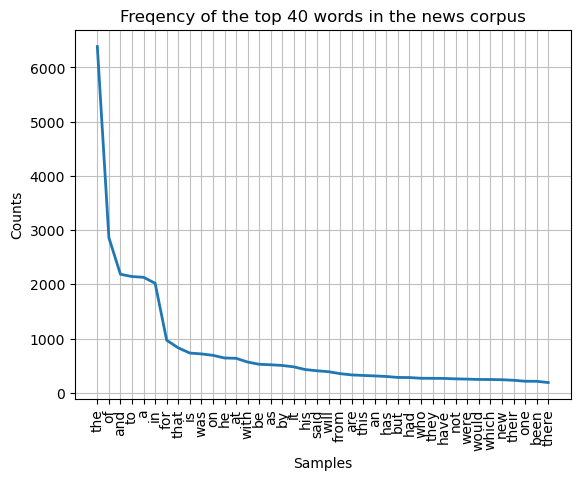

<Axes: title={'center': 'Freqency of the top 40 words in the news corpus'}, xlabel='Samples', ylabel='Counts'>

In [71]:
fwords_news = FreqDist(word.lower() for word in words_news if word.isalpha())
fwords_news.plot(40, title='Freqency of the top 40 words in the news corpus', cumulative=False, percents=False, show=True)

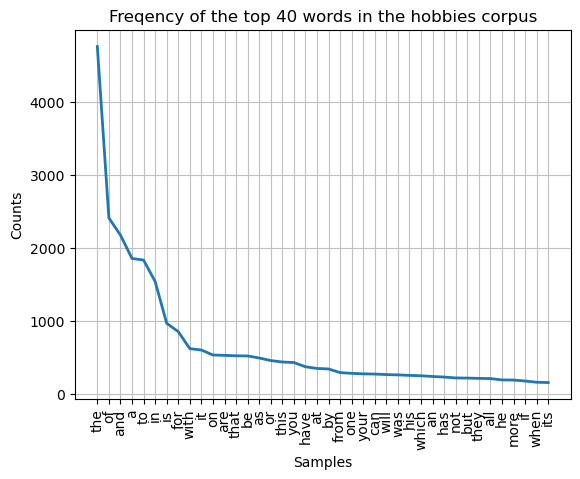

<Axes: title={'center': 'Freqency of the top 40 words in the hobbies corpus'}, xlabel='Samples', ylabel='Counts'>

In [80]:
fwords_hobbies = FreqDist(word.lower() for word in words_hobbies if word.isalpha())
fwords_hobbies.plot(40, title='Freqency of the top 40 words in the hobbies corpus', cumulative=False, percents=False, show=True)

sources used in this code:  
https://www.nltk.org/book/ch01.html  
https://www.nltk.org/book/ch02.html  
https://www.nltk.org/book/ch05.html   
https://www.geeksforgeeks.org/accessing-text-corpora-and-lexical-resources-using-nltk/  
https://www.geeksforgeeks.org/python-lemmatization-with-nltk/